# **Used Cars - Market Analysis**


<br></br>



In [ ]:
# Import libraries
from datetime import datetime   # Work with dates and times
import pandas as pd             # Data manipulation and analysis
import numpy as np              # Numerical computing, arrays, math operations

import seaborn as sns           # High-level statistical data visualization
import matplotlib.pyplot as plt # General plotting library for charts and figures

import scipy.stats as st        # Statistical functions
import statsmodels.api as sm    # Advanced statistical modeling
import statsmodels.graphics.gofplots as smg  # Diagnostic plots

from scipy.stats import f_oneway # One-way ANOVA test (compare means across multiple groups)
from scipy.stats import ttest_ind # Independent samples t-test (compare means between two groups)
from scipy.stats import pearsonr  # Pearson correlation coefficient (linear relationship strength)

# StandardScaler: normalize numeric features (mean=0, std=1)
# OneHotEncoder: convert categorical variables into binary indicator columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Linear regression
from sklearn.linear_model import LinearRegression

# Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Random Forest regressor and classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# accuracy_score: overall correctness of predictions
# classification_report for precision, recall, F1-score summary
# confusion_matrix for showing true vs predicted classes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# import metrics for model evaluation
from sklearn.metrics import r2_score, mean_squared_error



In [ ]:
# Google Drive file ID
file_id = '1x_pIdrDeA2i8y6havbdMusMfhlqZi2z5'

# Construct URL
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Load data
df = pd.read_csv(url)

# Show first five rows
df.head()

,Unnamed: 0,car,price,body,mileage,engV,engType,registration,year,model,drive
0,0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [ ]:
# Dataset size
print(df.shape)

(9576, 11)




---



# **EDA & Preprocessing**

In [ ]:
# Identify columns with missing values
missing_values = df.isnull().sum()
print("Columns with missing values:\n", missing_values)

Columns with missing values:
 Unnamed: 0        0
car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64


In [ ]:
# fill missing values with the mean
df['engV'] = df['engV'].fillna(df['engV'].mean())

# ffill missing values with the mode
df['drive'] = df['drive'].fillna(df['drive'].mode()[0])

In [ ]:
# Remove Unnamed:0 feature from dataset
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Get the current year
current_year = datetime.now().year

# Create car_age feature to handle scaling issues
df['car_age'] = current_year - df['year']

In [ ]:
# Re-check missing values
print(df.isnull().sum())
print()
print('Data Cleaning Successfull!')

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
car_age         0
dtype: int64

Data Cleaning Successfull!


In [ ]:
# Glimpse of summary statistics (without the column 'year' and 'car_age')
print('Summary Statistics:\n', df.drop(columns=['year','car_age']).describe().round(2))

Summary Statistics:
            price  mileage     engV
count    9576.00  9576.00  9576.00
mean    15633.32   138.86     2.65
std     24106.52    98.63     5.79
min         0.00     0.00     0.10
25%      4999.00    70.00     1.60
50%      9200.00   128.00     2.00
75%     16700.00   194.00     2.65
max    547800.00   999.00    99.99


### Comments:

* Price: The average used car price is ~15633, but with huge variability. A price of 0 (min=0) is unrealistic and there are signs of extreme entries (max=547800). A quarter of cars cost under 5k and the upper quartile cars are at 16700 dollars

* Mileage: Cars average ~139k miles, ranging from 0 to nearly 1000000 miles.

* Engine Volume: Typical engines are around 2.0–2.6L, but have extreme values (up to ~100L). This is likely due to some data anomalies.




<br></br>

### Heatmap

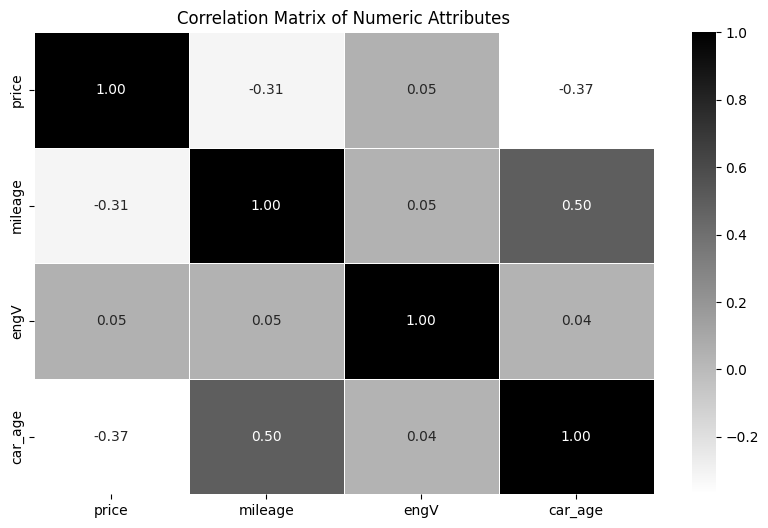

In [ ]:
# Compute correlation matrix with only numerical colunms (dropping year feature)
numeric_cols = df.select_dtypes(include='number').columns.drop('year')
correlation_matrix = df[numeric_cols].corr()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="binary", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Attributes")
plt.show()


### Comments:
* Price is negatively correlated with mileage and car age. Thus, older and high‑mileage cars tend to be cheaper.


* Engine volume (`engV`) shows very weak correlations with all other variables, suggesting it doesn't strongly influence price or mileage in this dataset.

<br></br>

### Histogram

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


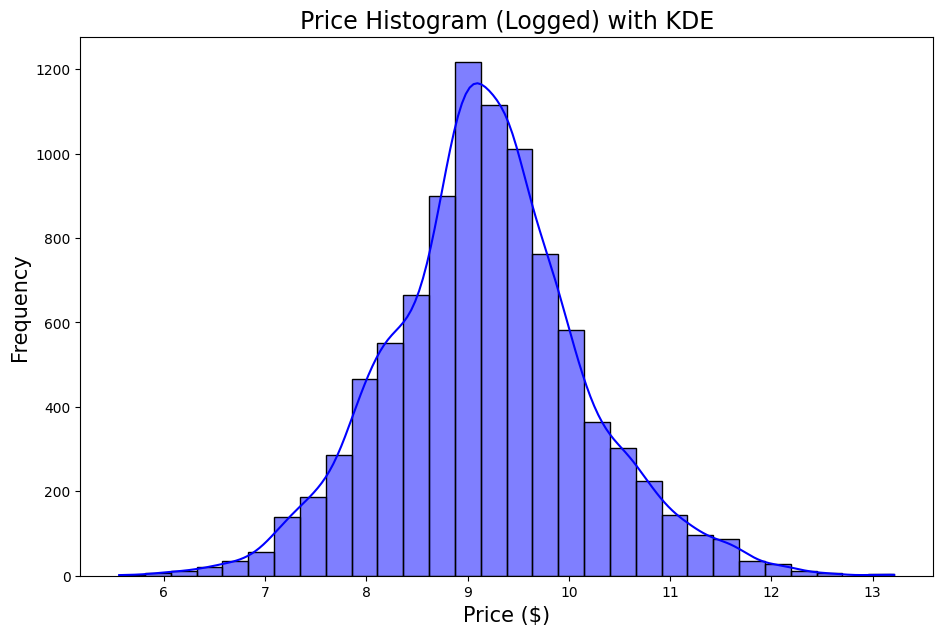

In [ ]:
# Plot logged price histogram
plt.figure(figsize=(11,7))
sns.histplot(x=np.log(df['price']), bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Price Histogram (Logged) with KDE', fontsize=17)
plt.xlabel('Price ($)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

#### Comments

1. The distribution of log-transformed prices is approximately normal.
1. Most sold vehicles are priced between 8,500 and 9,500 dollars, which suggests that the majority of sold cars fall into the mid-range affordability zone.

<br></br>

### Boxplots

/tmp/ipython-input-3383101886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["body"], y=df["price"], palette='muted',


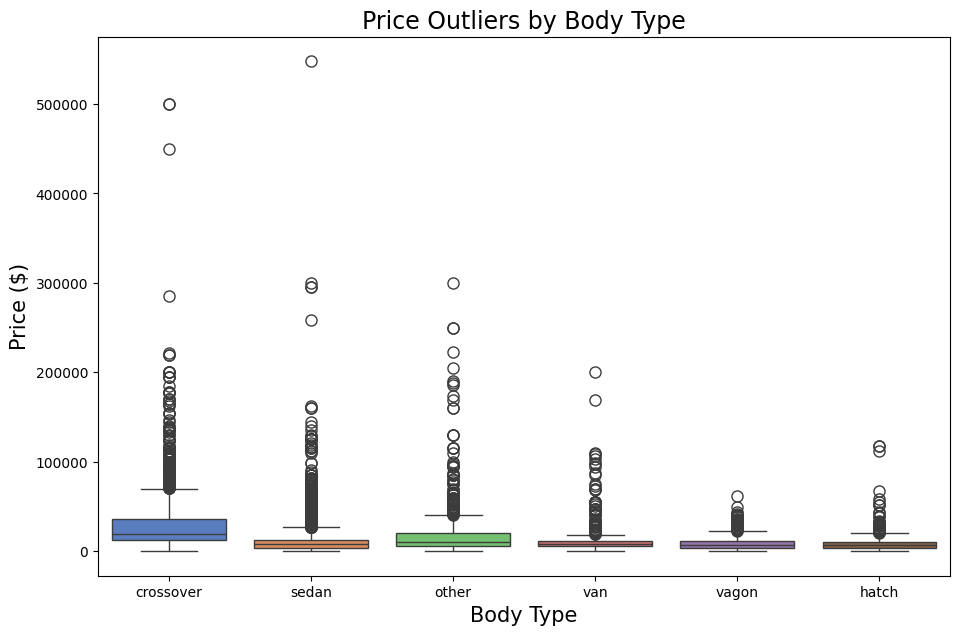

In [ ]:
# Create a box plot for  vs. price
plt.figure(figsize=(11, 7))
sns.boxplot(x=df["body"], y=df["price"], palette='muted',
            fliersize=8, width=0.8, data=df)
plt.title("Price Outliers by Body Type", fontsize=17)
plt.xlabel("Body Type", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.show()

/tmp/ipython-input-2520566670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["engType"], y=df["price"], palette='muted',


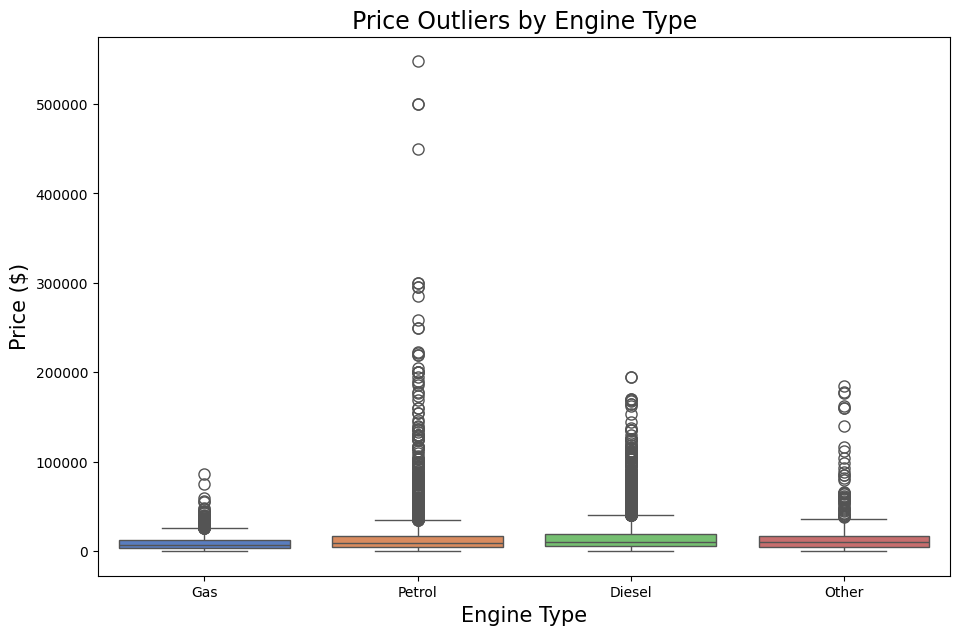

In [ ]:
# Create a box plot for engine type vs. price
plt.figure(figsize=(11, 7))
sns.boxplot(x=df["engType"], y=df["price"], palette='muted',
            fliersize=8, width=0.8, data=df)
plt.title("Price Outliers by Engine Type", fontsize=17)
plt.xlabel("Engine Type", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.show()

/tmp/ipython-input-2000407005.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["drive"], y=df["price"], palette='Set1',


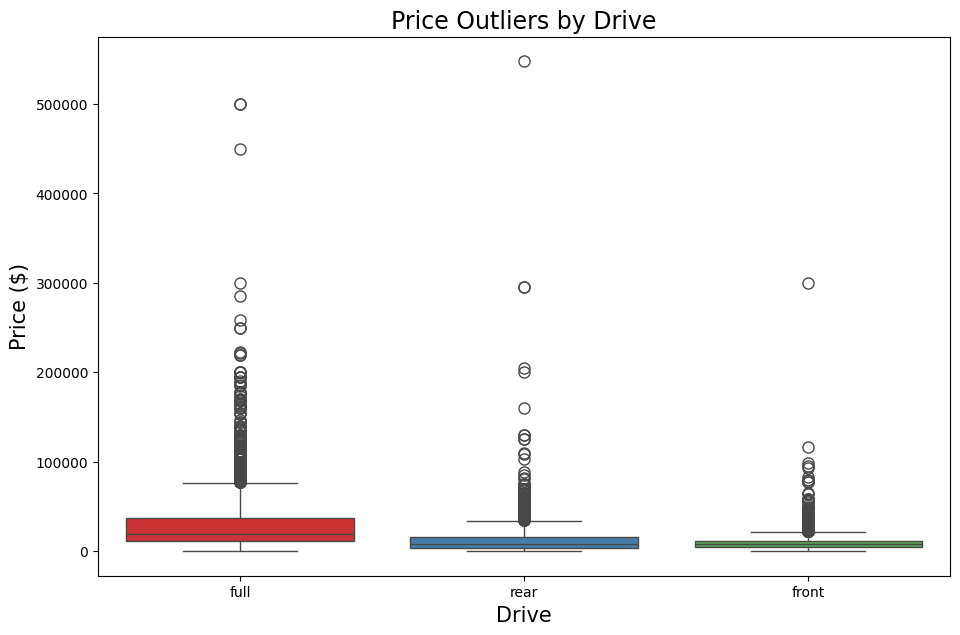

In [ ]:
# Create a box plot for drive vs. price
plt.figure(figsize=(11, 7))
sns.boxplot(x=df["drive"], y=df["price"], palette='Set1',
            fliersize=8, width=0.8, data=df)
plt.title("Price Outliers by Drive", fontsize=17)
plt.xlabel("Drive", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.show()

<br></br>

### Barplots

/tmp/ipython-input-3211788278.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_num.index, y=fuel_num.values, palette= colors,edgecolor='black')


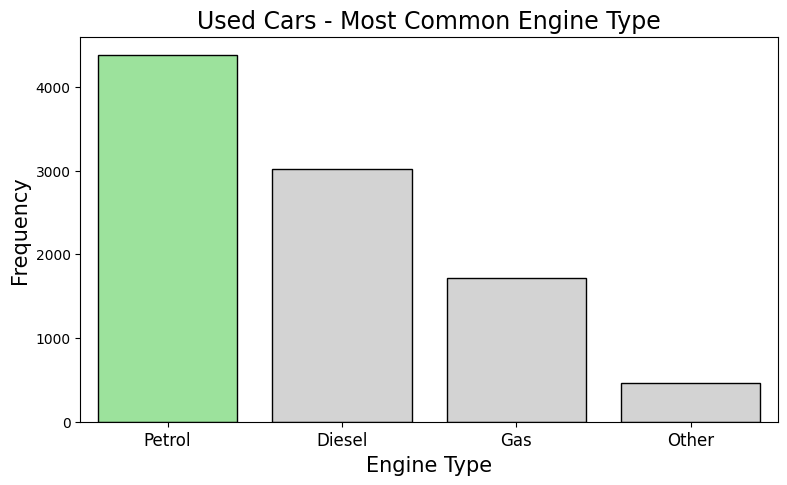

In [ ]:
# Counting the fuelType feature
fuel_num = df['engType'].value_counts()

# To determine the highest count
highest_fuel_type = fuel_num.idxmax()

#Color palette
colors = ['lightgreen' if fuel==highest_fuel_type else 'lightgrey' for fuel in fuel_num.index.tolist()]

# Creating the bar chart
plt.figure(figsize=(9,5))
sns.barplot(x=fuel_num.index, y=fuel_num.values, palette= colors,edgecolor='black')
plt.title('Used Cars - Most Common Engine Type', fontsize=17)
plt.xlabel('Engine Type', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Frequency', fontsize=15)
plt.show()

Based on this bar chart, dealerships should primarily focus on selling Petrol and Diesel cars, as they dominate the market in terms of quantity and availabilty.

/tmp/ipython-input-3359168323.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts2.index, y=value_counts2.values, palette= colors2,edgecolor='black')


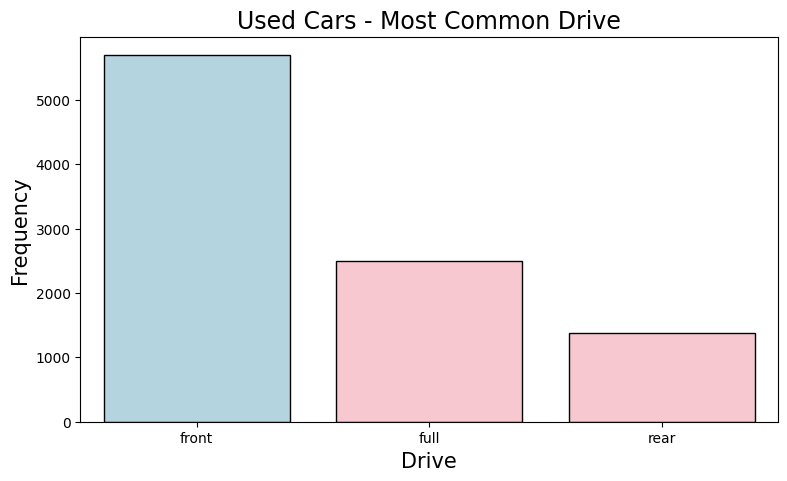

In [ ]:
# Count the occurrences of each unique value
value_counts2 = df['drive'].value_counts()

# To determine the highest drive
highest_drive_count = value_counts2.idxmax()

# Create color palette
colors2 = ['lightblue' if dr== highest_drive_count else 'pink' for dr in value_counts2.index]

# Create bar plot
plt.figure(figsize=(9,5))
sns.barplot(x=value_counts2.index, y=value_counts2.values, palette= colors2,edgecolor='black')
plt.title('Used Cars - Most Common Drive', fontsize=17)
plt.xlabel('Drive', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

### Comments:

1. Front-wheel drive dominates the used car market, with over 5,500 listings. This reflects its prevalence in mid-range vehicles, making it the most accessible and commonly stocked drive type for dealerships.

2. Full-wheel (AWD/4WD) drive ranks second, with around 2,500 listings. These vehicles are often SUVs or crossovers, thus suggesting solid availability for buyers seeking traction.

3. Rear-wheel drive is the least common, with just over 1,500 listings. Typically found in luxury sedans and performance cars, its lower frequency signals more selective inventory and volume.

/tmp/ipython-input-2341637927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_models.values, y=top_10_models.index, palette='Greys_r', edgecolor='red')


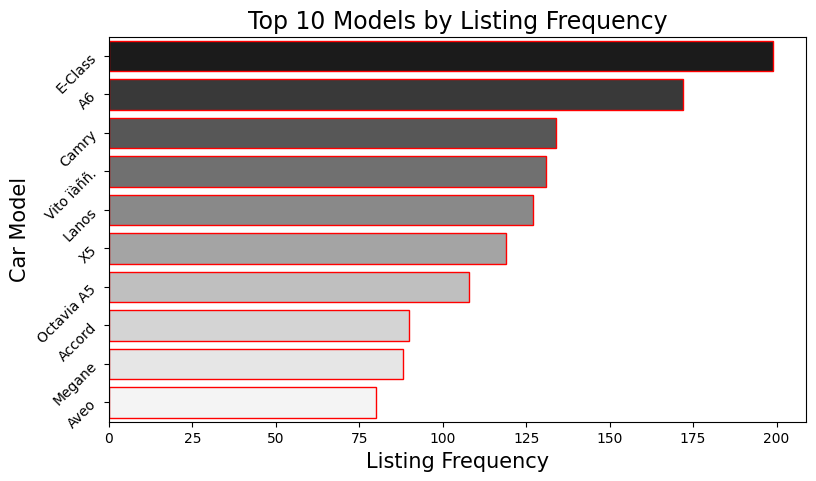

In [ ]:
# Showing the top 10 frequent used car models
top_10_models = df['model'].value_counts().head(10)

# Histogram showing top 10 models
plt.figure(figsize=(9, 5))
sns.barplot(x=top_10_models.values, y=top_10_models.index, palette='Greys_r', edgecolor='red')
plt.title("Top 10 Models by Listing Frequency", fontsize=17)
plt.xticks()
plt.xlabel("Listing Frequency", fontsize=15)
plt.ylabel("Car Model", fontsize=15)
plt.yticks(fontsize=10,rotation=45)
plt.show()

### Comments:
* **E-Class (Mercedes-Benz)**: The most frequently listed model in the dataset, reflecting strong availability in the used car market. This dominance suggest  brand popularity and high production volumne, giving dealers consistent inventory with minimal risk.
* **A6 (Audi)**: The second-highest common model, positioning itself as a direct competitor to the E-Class.

/tmp/ipython-input-3185476660.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pricey_models.values, y=top_pricey_models.index, palette="Reds_r", edgecolor="black")


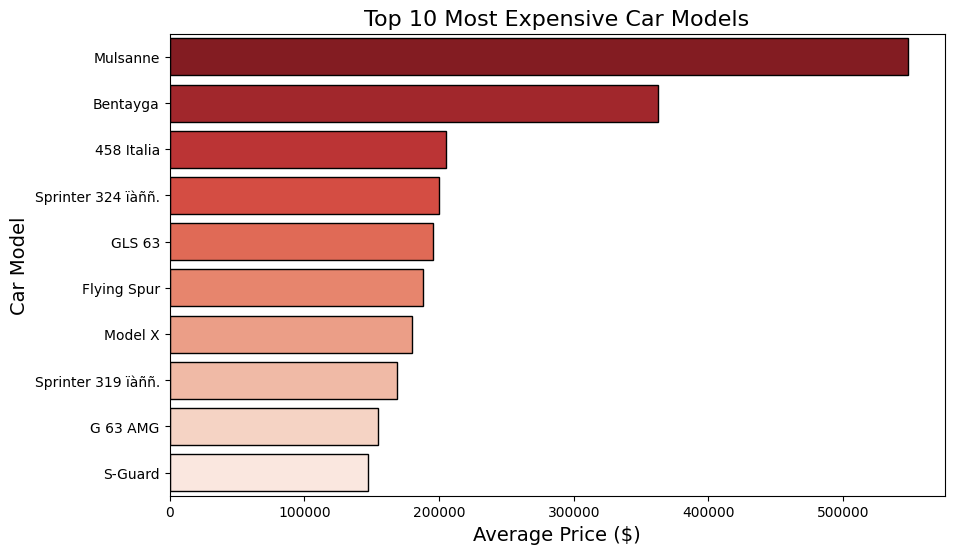

In [ ]:
# Calculate average price by model
avg_price_by_model = df.groupby('model')['price'].mean().sort_values(ascending=False)

# Show the top 10 most pricey models
top_pricey_models = avg_price_by_model.head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=top_pricey_models.values, y=top_pricey_models.index, palette="Reds_r", edgecolor="black")
plt.title("Top 10 Most Expensive Car Models", fontsize=16)
plt.xlabel("Average Price ($)", fontsize=14)
plt.ylabel("Car Model", fontsize=14)
plt.show()


### Comments:
* **Mulsanne (Bentley)**: As an ultra-luxury sedan type, it stands as the highest expensive model in the dataset. Its market presence reflect prestige and elegance, with limited availability and high resale value. For dealerships, Mulsanne represents a rare inventory opportunity and is best suited for high-net-worth clients.
* **Bentayga (Bentley)**: As a luxury SUV, the Bentayga ranks second in average price, combining comfort and off-road capability. Dealers can position it as a versatile luxury option, appealing to rich families or executives looking for both style and utility.

<br></br>

### Scatterplots

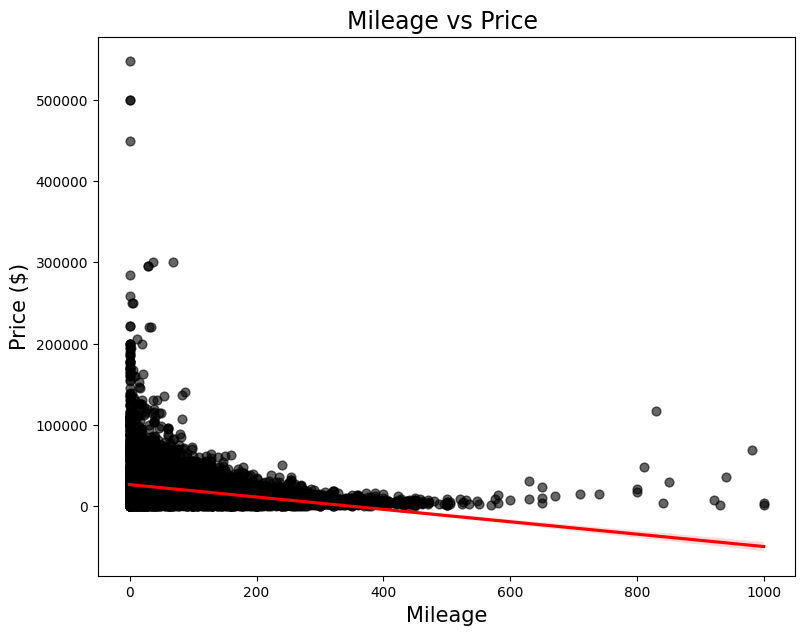

In [ ]:
# Regression plot: mileage vs price
plt.figure(figsize=(9,7))
sns.regplot(x='mileage', y='price', data=df,scatter_kws={'color':'black','s': 40, 'alpha': 0.6},
            line_kws={'color': 'red'})
plt.title("Mileage vs Price ", fontsize=17)
plt.xlabel("Mileage", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.show()

On average, the more mileage a used car has, the lower its market price tends to be.

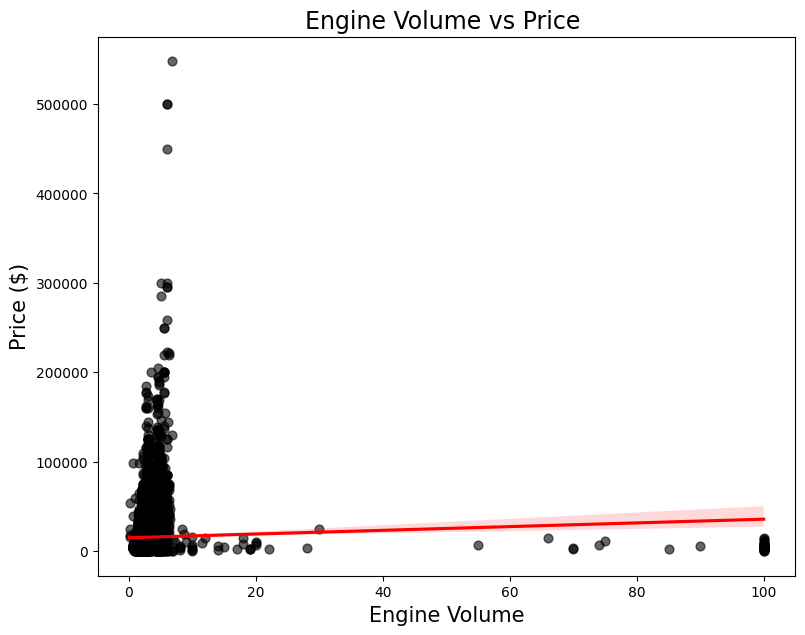

In [ ]:
# Regression plot: engine volume vs price
plt.figure(figsize=(9,7))
sns.regplot(x='engV', y='price', data=df,scatter_kws={'color':'black','s': 40, 'alpha': 0.6},
            line_kws={'color': 'red'})
plt.title("Engine Volume vs Price ", fontsize=17)
plt.xlabel("Engine Volume", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.show()



---



# **Hypothesis Section**

In [ ]:
# Pearson correlation (linear relationship)
r_mileage, p_mileage = pearsonr(df['mileage'], df['price'])
r_engine, p_engine = pearsonr(df['engV'], df['price'])
r_car_age, p_car_age = pearsonr(df['car_age'], df['price'])

print(f"Pearson Correlation (Car Age vs Price): r = {r_car_age:.3f}, p = {p_car_age:.3f}")
print()
print(f"Pearson Correlation (Engine Size vs Price): r = {r_engine:.3f}, p = {p_engine:.3f}")
print()
print(f"Pearson correlation (Mileage vs Price): r = {r_mileage:.3f}, p = {p_mileage:.3f}")

Pearson Correlation (Car Age vs Price): r = -0.370, p = 0.000

Pearson Correlation (Engine Size vs Price): r = 0.050, p = 0.000

Pearson correlation (Mileage vs Price): r = -0.312, p = 0.000


All selected features are statistically correlated with the price of used cars.

<br></br>

## Hypothesis: Cars under 10 years old have higher prices.

1. H0: There is no significant difference in average price between cars that are 10 years old or younger and those older than 10 years. `Mu_new_cars <= Mu_old_cars`

2. H1: Cars that are 10 years old or younger have a higher average price than older cars.`Mu_new_cars > Mu_old_cars`

In [ ]:
# Create young and old cars
young = df[df['car_age'] <= 10]['price']
old = df[df['car_age'] > 10]['price']

# t-test results
t_stat, p_val = ttest_ind(young, old)
print(f"T-test: t = {t_stat:.2f}, p = {p_val:.4f}")

T-test: t = 42.42, p = 0.0000


There is enough evidence to reject the Null hypothesis. As expected, used cars under ten years old tend to be more expensive on average.

<br></br>

## Hypothesis: Do cars with larger engines volume (> 1.5L) have higher prices?

1. H0: Small engine volume are less expensive than larger ones. `Mu_small_engine <= Mu_large_engine`

2. H1: Small engine volume cars are more expensive than large engine volume cars.`Mu_small_engine > Mu_large_engine`

In [ ]:
# Create small and large engine size
small = df[df['engV'] < 1.5]['price']
large = df[df['engV'] >= 1.5]['price']

# t-test results
t_stat, p_val = ttest_ind(small, large)
print(f"T-test: t = {t_stat:.2f}, p = {p_val:.4f}")

T-test: t = -12.62, p = 0.0000


Turns out, there is enough evidence to say that the average price of small engines tends to be higher than larger engines, likely due to smaller engines strong association with high-end specs.



<br></br>

## Hypothesis: do price differs significantly across engine types?

In [ ]:
# Compare price across engine types
grouped = [group['price'].values for name, group in df.groupby('engType')]
f_stat, p_val = f_oneway(*grouped)

print(f"ANOVA for Fuel Type vs Price: F = {f_stat:.2f}, p = {p_val:.4f}")

ANOVA for Fuel Type vs Price: F = 50.49, p = 0.0000


Engine type has a real impact on used car pricing, and I can confidently say that at least one engine type group has a different average price than the others. This supports the hypothesis that vehicles with different engine types influence market value.





---



# **Modeling & Evaluation**

**Problem Statment:** Can we accurately predict the price of a used car from its mileage, age, engine size, and categorical features?


### Linear Regression

Some values in `price` and `mileage`were detected to be zero. During modeling, these values will be filtered and only positive values  will be picked.

In [ ]:
print("Zero prices:", (df['price'] == 0).sum())
print("Negative prices:", (df['price'] < 0).sum())

Zero prices: 267
Negative prices: 0


In [ ]:
print("Zero prices:", (df['mileage'] == 0).sum())
print("Negative prices:", (df['mileage'] < 0).sum())

Zero prices: 348
Negative prices: 0


In [ ]:
# Copy original data
df_model = df.copy()

# Log transform price
df_model['log_price'] = np.log(df_model['price'])

# Drop rows where mileage is 0
df_model = df_model[df_model['mileage'] != 0]

# Handle rows where price is equal to 0 to prevent errors
# Remove rows where log_price is not finite
df_model = df_model[np.isfinite(df_model['log_price'])]

# Select features
X = df_model[['mileage', 'engV', 'car_age', 'body', 'engType', 'registration', 'drive', 'car']]
y = df_model['log_price']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize numeric variables
numeric_cols = ['mileage', 'engV', 'car_age']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform only numeric columns
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

#  Train dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit regression
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("R squarred:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


R squarred: 0.841763885273685
RMSE: 0.36844870674963287


### Comments:
* **$R$2 = 0.8417:** The model explains about 86% of the variance in log transformed car prices. The chosen features capture most of the pricing signal.

* **RMSE = 0.3684:**  On average, the model's predictions deviate from actual logged prices by ~37%



<br></br>

Since the model predicts log(price), RMSE is measured in log units. An RMSE of 0.37 means that the model's predictions are usually within 30-40% of the actual car price.
#### Examples:
1. If a car is listed at 10,000, the model's prediction is usually within about 6,300–13,700 dollars.

2. If a car is listed at $20,000, the prediction is typically within about 12,600–27,400 dollars.

### Linear Regression Diagnostics

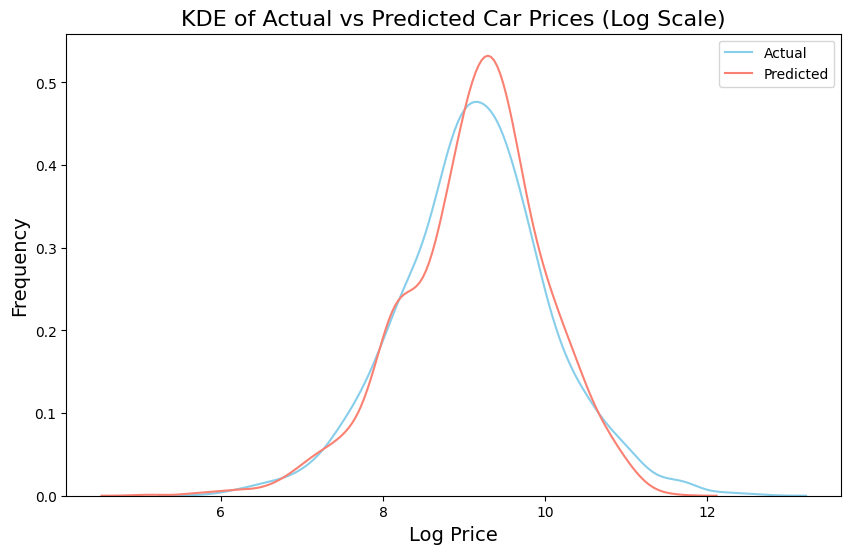

In [ ]:
# Plot KDE of actual vs predicted (log-transformed prices)
plt.figure(figsize=(10,6))
sns.kdeplot(y_test, color='skyblue', label='Actual')
sns.kdeplot(y_pred, color='salmon', label='Predicted')
plt.title("KDE of Actual vs Predicted Car Prices (Log Scale)", fontsize=16)
plt.xlabel("Log Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.show()


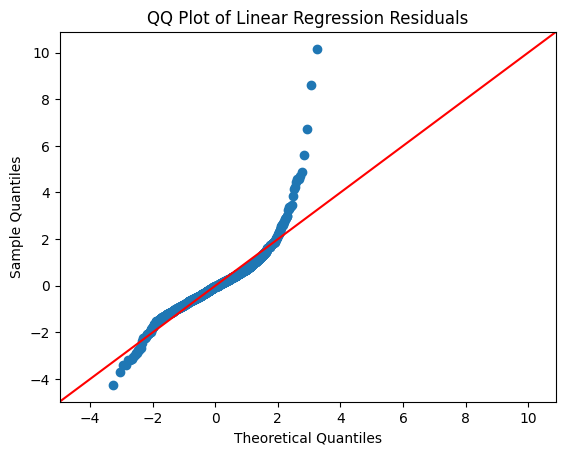

In [ ]:
# Compute residuals
residuals = y_test - y_pred

# QQ plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Linear Regression Residuals")
plt.show()

Plot shows noticeable deviation in the upper tail where the dots curve away from the line. This suggests that the residuals are not perfectly normally distributed, especially for high-priced cars. This means the model may struggle to predict luxury outliers accurately.

### Possible causes:

* Extreme outliers (luxury cars like Bentleys) skew the distribution.

* Non-linear relationships not fully captured by the model.

* Heteroscedasticity, which is the variance of errors that increases with price.



**Attempting Random Forest Regressor to improve model fit.**

In [ ]:
# Select features
X = df_model[['mileage', 'engV', 'car_age', 'body', 'engType', 'registration', 'drive', 'car']]
y = df_model['log_price']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize numeric variables
numeric_cols = ['mileage', 'engV', 'car_age']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform only numeric columns
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

#  Train dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit regression
model2 = RandomForestRegressor(random_state=42, n_estimators=200)
model2.fit(X_train, y_train)

# Model evaluation
y_pred2 = model2.predict(X_test)
print("R squarred:", r2_score(y_test, y_pred2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred2)))


R squarred: 0.9089830285149771
RMSE: 0.2794379723768136


### $R$2 = 0.91
Now with Random Forest, about 91% of the variance in car prices, which is stronger than the linear regression (~84%). This shows the model is capturing more of the complex, nonlinear patterns in the data.

### RMSE = 0.28 (log scale):
 On the original price scale, this translates to predictions being off by about 25–30% of the actual car price. That's a tighter error margin compared to the linear model (~37%).

<br></br>

# Classification

**Problem Statement:** Can cars be classified into young (<=10 years old) vs. old (>10 years old) based on mileage, engine volume, body, and drive?

### Logistic Regression

In [ ]:
# Target feature (young cars or class 1)
y = (df_model['car_age'] <= 10).astype(int)

# Create predictors
X = df_model[['mileage', 'engV', 'body', 'drive', 'price']]

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale numeric features
numeric_cols = ['mileage', 'engV', 'price']
scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Fit logistic regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Evaluate model
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8951165371809101
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1735
           1       0.26      0.96      0.40        67

    accuracy                           0.90      1802
   macro avg       0.63      0.92      0.67      1802
weighted avg       0.97      0.90      0.92      1802



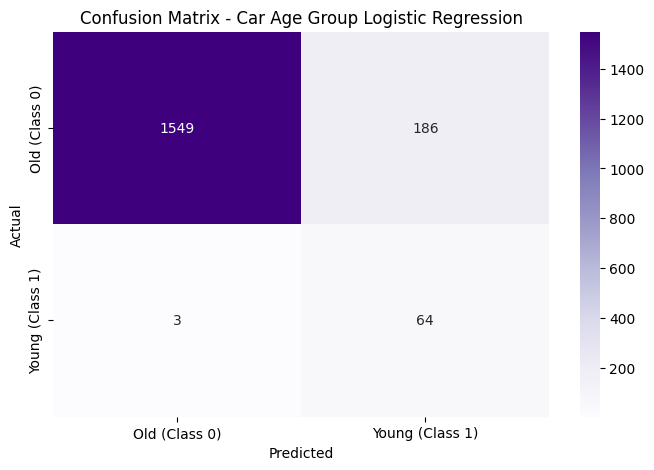

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Old (Class 0)', 'Young (Class 1)'],
            yticklabels=['Old (Class 0)', 'Young (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Car Age Group Logistic Regression')
plt.show()


###  Result Interpretation
* The model correctly classifies 90% of cars into young vs. old.

* The model is very good at identifying old cars *(Class 0)* due to high precision and recall.

* For young cars *(Class 1)*, it's great at recall (99%) but weak at precision (43%), as it rarely misses a young car, but often mislabels old cars as young.

<br></br>

### Random Forest Classifier

In [ ]:
# Target: car age grouped
y = (df['car_age'] <= 10).astype(int)

# Features: mileage, engine volume, body type, drive
X = df[['mileage', 'engV', 'body', 'drive']]

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Fit Random Forest
rf_model = RandomForestClassifier(n_estimators=200,
    max_depth=None,
    class_weight='balanced',# handle imbalance
    random_state=4)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9665970772442589
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1774
           1       0.74      0.84      0.79       142

    accuracy                           0.97      1916
   macro avg       0.87      0.91      0.88      1916
weighted avg       0.97      0.97      0.97      1916



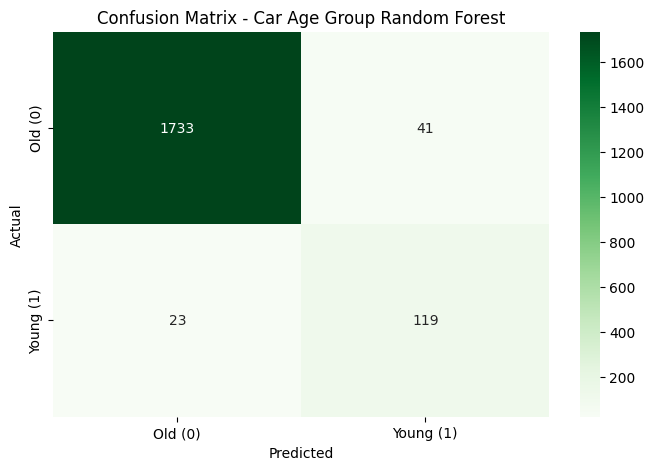

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Old (0)', 'Young (1)'],
            yticklabels=['Old (0)', 'Young (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Car Age Group Random Forest')
plt.show()

### Result Interpretation
* The model correctly classifies ~ 97% of cars into young vs. old.

* Old cars *(Class 0)* are classified almost perfectly.

* The model is now much more reliable for both classes

<br></br>

### Feature Importance

/tmp/ipython-input-2190408617.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="summer_r")


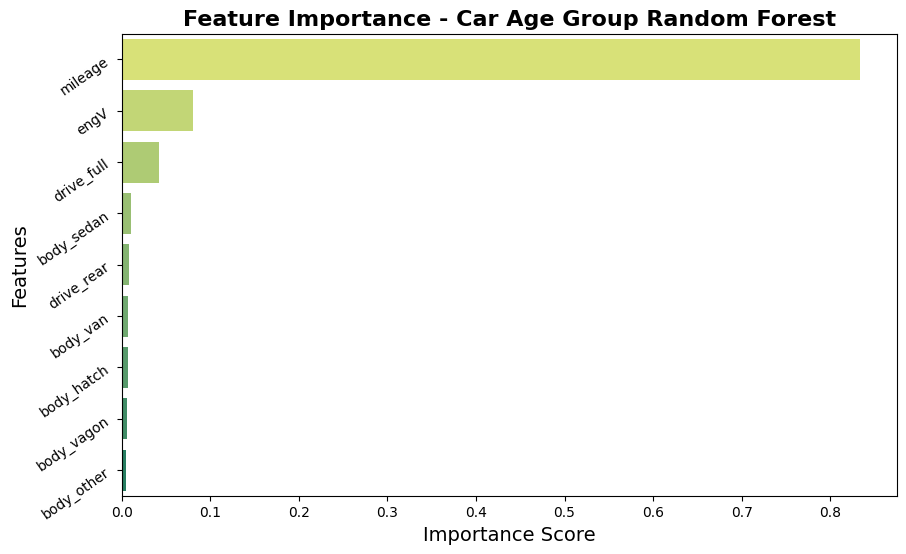

In [ ]:
# Get feature importances from the trained Random Forest
feat_importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)

# Sort values
feat_importances = feat_importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="summer_r")
plt.title("Feature Importance - Car Age Group Random Forest", weight='bold',fontsize=16)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.yticks(rotation=35)
plt.show()




---



# Final Note

After cleaning unrealistic zero entries for both `price`and `mileage`, the model's $R$2 decreased marginally from 0.86 to 0.84. This small change reflects the trade‑off between keeping more data versus ensuring data quality. The cleaned dataset is more reliable, even if predictive power dipped slightly.

The strong $R$2 demonstrates that linear regression is effective for this dataset, especially after log transforming the price to stabilize variance. However, QQ‑plot diagnostics revealed that residuals were not normally distributed, particularly for high‑priced luxury cars. To address this limitation, a Random Forest regressor was applied, which captured nonlinear patterns more effectively and improved overall model fit and accuracy.
The relatively low RMSE confirms that predictions are close to observed values, making the model practical for dealership' s decision-making.

For classification, the Random Forest model outperformed Logistic Regression by achieving higher accuracy and providing a more balanced identification of both young and old cars. **Mileage emerged as the most influential predictor**, confirming that usage history is the strongest signal of vehicle age. Engine volume, body type, and drive type offered secondary predictive power, but the dominance of mileage underscores its critical role in classification. This refined conclusion highlights Random Forest as the most reliable approach for distinguishing car age groups while maintaining interpretability for practical applications.